<a href="https://colab.research.google.com/github/jorgenriquez/Redes-Neuronales-con-Python/blob/main/backprop_dosneuronasdeentrada_unaneuronadesalida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la salida
Target = float(input('Valor de salida deseado\n'))

# Definir las entradas X1 y X2
X1 = float(input('Valor de entrada X1\n'))
X2 = float(input('Valor de entrada X2\n'))

# Definir error máximo
emax = float(input('Valor deseado del error\n'))

# Definir número máximo de iteraciones
it = int(input('Número máximo de iteraciones\n'))

# Definir coeficiente de aprendizaje
c = float(input('Coeficiente de aprendizaje\n'))

s = []
e = []
err = 5
iter = 1

# Pesos iniciales aleatorios
N1E1 = np.random.rand()
N1E2 = np.random.rand()
N2E1 = np.random.rand()
N2E2 = np.random.rand()
N3E1 = np.random.rand()
N3E2 = np.random.rand()

# Mientras el error sea mayor a la tolerancia y el número de iteraciones no
# sobrepase al máximo, repetir el algoritmo de aprendizaje backpropagation
while iter < it and err >= emax:
    # Salida de cada neurona -> Función Sigmoidal(Sumatoria(entradas*pesos))
    SN1 = 1 / (1 + np.exp(-(X1 * N1E1 + X2 * N1E2)))
    SN2 = 1 / (1 + np.exp(-(X1 * N2E1 + X2 * N2E2)))

    # Salida de la neurona de la capa de salida
    SN3 = 1 / (1 + np.exp(-(SN1 * N3E1 + SN2 * N3E2)))

    # Encontrar el coeficiente de sensibilidad del error en la neurona de salida
    # Error * derivada de la función de activación (sigmoidal)
    Error = Target - SN3
    SenE3 = Error * SN3 * (1 - SN3)

    # Calcular los nuevos pesos en la última capa
    N3E1 += SenE3 * SN1 * c
    N3E2 += SenE3 * SN2 * c

    # Calcular la sensibilidad de las capas ocultas
    SenE1 = SenE3 * N3E1 * SN1 * (1 - SN1)
    SenE2 = SenE3 * N3E2 * SN2 * (1 - SN2)

    # Actualizar los pesos en las capas ocultas
    N1E1 += SenE1 * X1 * c
    N1E2 += SenE1 * X2 * c
    N2E1 += SenE2 * X1 * c
    N2E2 += SenE2 * X2 * c

    # Calcular las nuevas salidas
    SN1 = 1 / (1 + np.exp(-(X1 * N1E1 + X2 * N1E2)))
    SN2 = 1 / (1 + np.exp(-(X1 * N2E1 + X2 * N2E2)))
    SN3 = 1 / (1 + np.exp(-(SN1 * N3E1 + SN2 * N3E2)))

    # Calcular el nuevo error
    err = Target - SN3

    # Aumentar el número de iteración
    iter += 1

    e.append(err)
    s.append(SN3)



Valor de salida deseado
1
Valor de entrada X1
3
Valor de entrada X2
2
Valor deseado del error
0.1
Número máximo de iteraciones
10
Coeficiente de aprendizaje
0.3


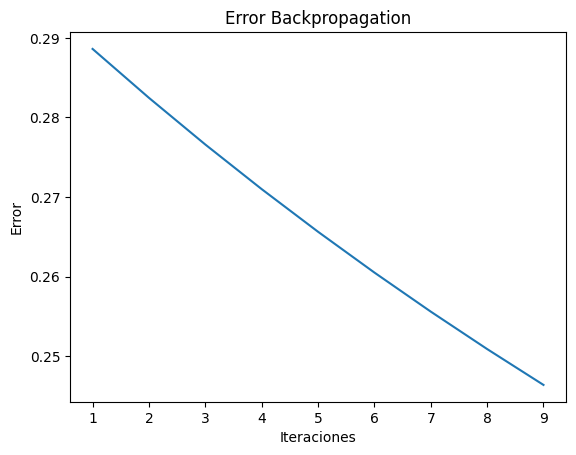

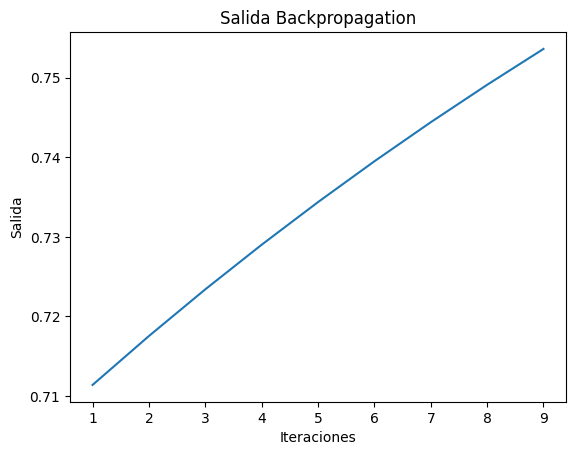

In [3]:
# Gráficos de error y salida
plt.plot(range(1, iter), e)
plt.title('Error Backpropagation')
plt.ylabel('Error')
plt.xlabel('Iteraciones')
plt.show()

plt.plot(range(1, iter), s)
plt.title('Salida Backpropagation')
plt.ylabel('Salida')
plt.xlabel('Iteraciones')
plt.show()
